In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
load_all = pd.read_csv('.\data\load_2022.csv')
load_all.head()  

,Hour Ending,ERCOT
0,01/01/2022 01:00,"38,006.94"
1,01/01/2022 02:00,"37,036.52"
2,01/01/2022 03:00,"35,881.61"
3,01/01/2022 04:00,"35,044.06"
4,01/01/2022 05:00,"34,585.57"


In [3]:
for index, row in load_all.iterrows():
    string_number = row["ERCOT"]
    float_number = float(string_number.replace(',', ''))
    if float_number >100000 or float_number <10000:
        print(row)

In [4]:
load_all["Hour"] = 0
load_all["Season"] = 0
print(load_all.shape)

(8760, 4)


In [5]:
wrong_format = []
for index, row in load_all.iterrows():
    load_all.iloc[index,2] = index%24+1

    string_number = row["ERCOT"]
    float_number = float(string_number.replace(',', ''))
    load_all.iloc[index,1] = float_number/1000

    time_string = row['Hour Ending']
    month = int(time_string[0:2])
    if month==1 or month==2 or month == 12:
        load_all.iloc[index,3] = 'Winter'
    elif month >= 3 and month < 6:
        load_all.iloc[index,3] = 'Spring'
    elif month >= 6 and month < 9:
        load_all.iloc[index,3] = 'Summer'
    elif month >= 9 and month < 12:
        load_all.iloc[index,3] = 'Autumn'
    elif month>12:
        wrong_format.append(index)
print(wrong_format)
load_all.drop(wrong_format, inplace=True)
load_all = load_all.rename(columns={'ERCOT': 'Load (GW)'})
load_all.head()

[8016]


,Hour Ending,Load (GW),Hour,Season
0,01/01/2022 01:00,38.00694,1,Winter
1,01/01/2022 02:00,37.03652,2,Winter
2,01/01/2022 03:00,35.88161,3,Winter
3,01/01/2022 04:00,35.04406,4,Winter
4,01/01/2022 05:00,34.58557,5,Winter


In [6]:
for index, row in load_all.iterrows():
    if row["Season"] == '0' or row["Season"] == 0:
        # print(row)
        time_string = row['Hour Ending']
        month = int(time_string[0:2])
        print(month, index)

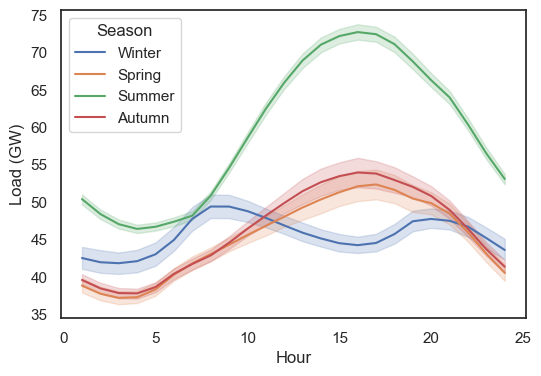

In [7]:
# 
# Plot the responses for different events and regions
%matplotlib inline
plt.figure(figsize=(6,4))
sns.set_theme(style="white")
sns.lineplot(x="Hour", y="Load (GW)",
             hue="Season",
             data=load_all)
plt.savefig(".\pics\load_profile.pdf")